In [1]:
import imgaug.augmenters as iaa

In [2]:
from torchvision import datasets
import torch
data_folder = '/constant/'
fmnist = datasets.FashionMNIST(data_folder,download=True,train=True)


Extracting /constant/FashionMNIST/raw/train-images-idx3-ubyte.gz to /constant/FashionMNIST/raw




Extracting /constant/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /constant/FashionMNIST/raw




Extracting /constant/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /constant/FashionMNIST/raw




Extracting /constant/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /constant/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
tr_images = fmnist.data
tr_targets = fmnist.targets 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Text(0.5, 1.0, 'Original Image')

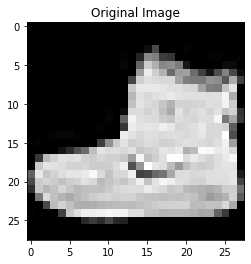

In [5]:
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original Image')

Text(0.5, 1.0, 'translated image by 10 pixels(right and bottom')

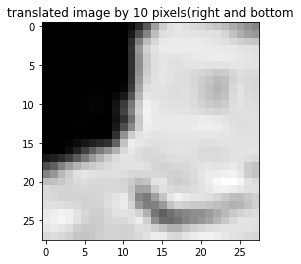

In [6]:
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray')
plt.title('translated image by 10 pixels(right and bottom')

Text(0.5, 1.0, 'Translated image by 10 pixels (right and bottom)')

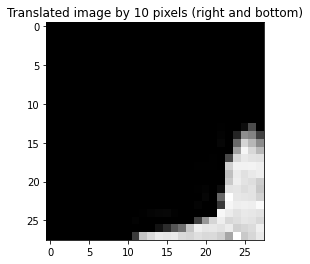

In [7]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray')
plt.title('Translated image by 10 pixels (right and bottom)')

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixels over rows')

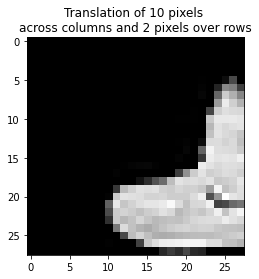

In [8]:
aug = iaa.Affine(translate_px={'x':10,'y':2})
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title('Translation of 10 pixels \nacross columns and 2 pixels over rows')


Text(0.5, 1.0, 'Rotation of image by -30 degrees')

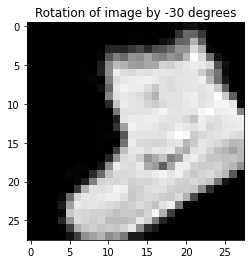

In [9]:
aug = iaa.Affine(rotate=-30)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title('Rotation of image by -30 degrees')

Text(0.5, 1.0, 'shear of Image by 30 degrees')

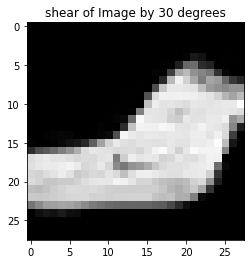

In [10]:
aug = iaa.Affine(shear=30)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("shear of Image by 30 degrees")

Text(0.5, 1.0, 'shear of Image by -30 degrees')

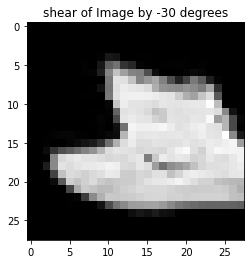

In [11]:
aug = iaa.Affine(shear=-30)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("shear of Image by -30 degrees")

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

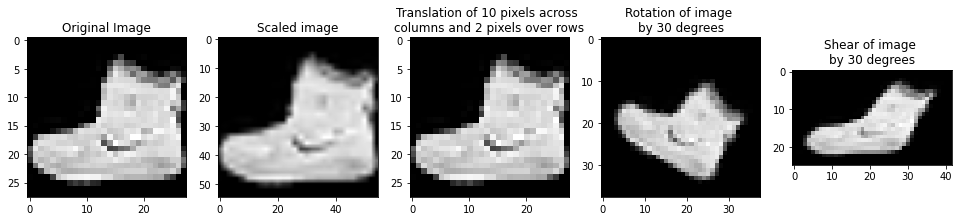

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0],cmap='gray')
plt.title('Original Image')

plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

### **In Translate pixel cval =255**

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

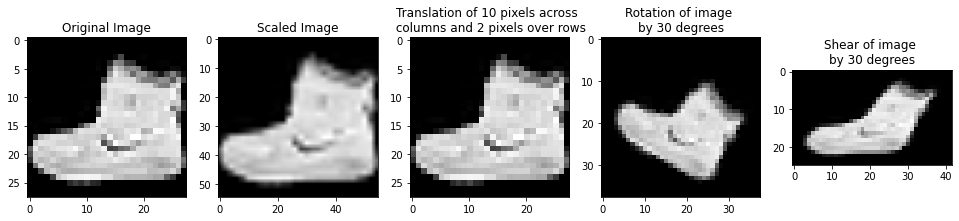

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original Image')
plt.subplot(162)
aug = iaa.Affine(scale=2,fit_output=True) # fit_output will create a new pixels..
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Scaled Image")
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2},fit_output=True,cval=255)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Translation of 10 pixels across \n columns and 2 pixels over rows")
plt.subplot(164)
aug = iaa.Affine(rotate=30,fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30,fit_output=True)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title('Shear of image \nby 30 degrees')

Text(0.5, 1.0, 'Rotation of Image by 30 degrees')

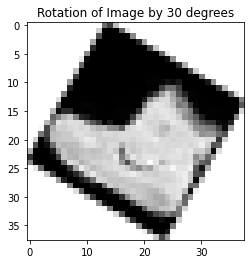

In [14]:
aug = iaa.Affine(rotate=30,fit_output=True,cval=255)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title('Rotation of Image by 30 degrees')

### **Apply mode parameter**

Text(0.5, 1.0, 'Rotation of Image by \n 30 degrees with wrap mode ')

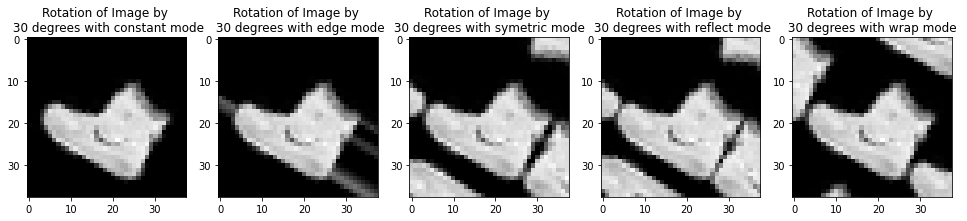

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(161)
aug = iaa.Affine(rotate=30,fit_output=True,cval=0,mode='constant')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Rotation of Image by \n 30 degrees with constant mode")
plt.subplot(162)
aug = iaa.Affine(rotate=30,fit_output=True,cval=0,mode='edge')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Rotation of Image by \n 30 degrees with edge mode")
plt.subplot(163)
aug = iaa.Affine(rotate=30,fit_output=True,cval=0,mode='symmetric')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Rotation of Image by \n 30 degrees with symetric mode ")
plt.subplot(164)
aug = iaa.Affine(rotate=30,fit_output=True,cval=0,mode='reflect')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Rotation of Image by \n 30 degrees with reflect mode")
plt.subplot(165)
aug = iaa.Affine(rotate=30,fit_output=True,cval=0,mode='wrap')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.title("Rotation of Image by \n 30 degrees with wrap mode ")


### **Similarly we have specified that the rotation angle should be a specific degree..**

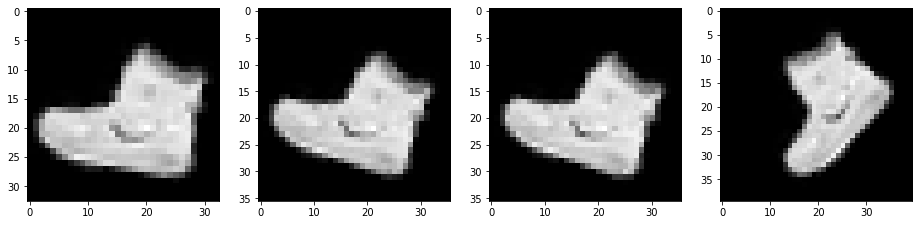

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(151)
aug = iaa.Affine(rotate=(-45,45),fit_output=True,cval=0,mode ='constant')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.subplot(152)
aug = iaa.Affine(rotate=(-45,45),fit_output=True,cval=0,mode='constant')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.subplot(153)
aug = iaa.Affine(rotate=(-45,45),fit_output=True,cval=0,mode='constant')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')
plt.subplot(154)
aug = iaa.Affine(rotate=(-45,45),fit_output=True,cval=0,mode='constant')
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')


 the same image was rotated differently in different iterations because we specified a range of possible rotation angles in terms of the upper and lower bounds of the rotation

### Apply Multiply Method to maintain the background and foreground pixels values of both ... 

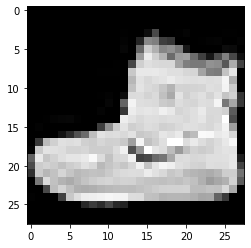

In [17]:
aug  = iaa.Multiply(1)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray')

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

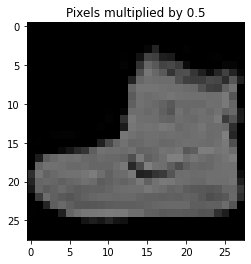

In [18]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray',vmin=0,vmax=255)
plt.title('Pixels multiplied by 0.5')

### **Apply Linear contrast to adjust each pixels..**

Text(0.5, 1.0, 'Pixel contrast by 0.5')

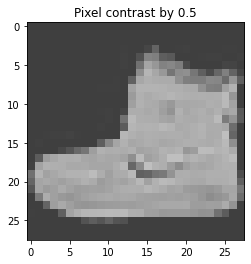

In [20]:
# After output background become more bright , while the foreground pixels become reduced..
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray',vmin=0,vmax=255)
plt.title('Pixel contrast by 0.5')


### **Blur the image using Gaussain Blur**

Text(0.5, 1.0, 'Gaussian blurring of image')

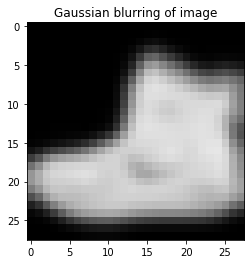

In [21]:
aug = iaa.GaussianBlur(sigma=1)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray',vmin=0,vmax=255)
plt.title('Gaussian blurring of image')

### **Grainy images due to bad photography . we may apply two new method Dropout and SaltAndPepper, that can help in simulating grainy image conditions**

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

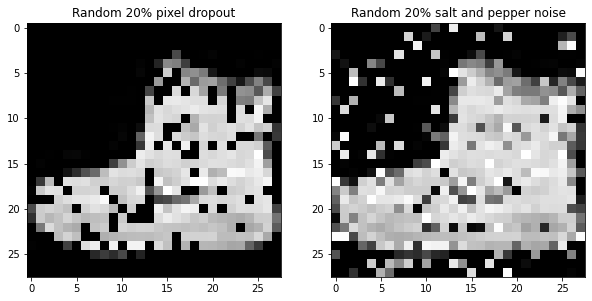

In [22]:
# Dropout
plt.figure(figsize=(10,10))
plt.subplot(121)
aug = iaa.Dropout(p=0.2,)
plt.imshow(aug.augment_image(tr_images[0]),cmap='gray',vmin=0,vmax=255)
plt.title('Random 20% pixel dropout')
# SaltAndPepper
plt.subplot(122)
aug = iaa.SaltAndPepper(0.2,)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

Text(0.5, 1.0, 'Random 20% pixel dropout')

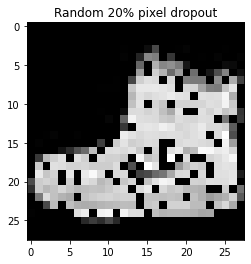

In [23]:
aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout')

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

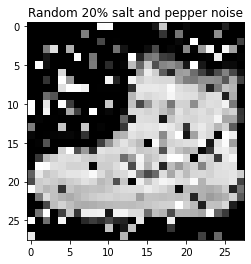

In [24]:
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(tr_images[0]), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

**Performing a sequence of Augmentation..**

In [25]:
seq = iaa.Sequential([
iaa.Dropout(p=0.2,),
iaa.Affine(rotate=(-30,30))],random_order=True)

Text(0.5, 1.0, 'Image augmented using a \nrandom orderof the two augmentations')

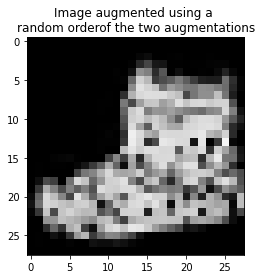

In [26]:
plt.imshow(seq.augment_image(tr_images[0]), cmap='gray',vmin = 0, vmax = 255)
plt.title('Image augmented using a \nrandom orderof the two augmentations')